In [1]:
import numpy as np
import matplotlib.pyplot as plt
import string

In [3]:
pi = np.loadtxt("initialStateDistribution.txt", dtype=float)
a = np.loadtxt("transitionMatrix.txt", dtype=float)
b = np.loadtxt("emissionMatrix.txt", dtype=float)
o = np.loadtxt("observations.txt", dtype=int)

In [5]:
num_states = 27 
T = len(o) 
alphabet = dict(zip(range(1, 28), string.ascii_lowercase + ' '))

In [7]:
log_prob = np.zeros((num_states, T))
backtrack = np.zeros((num_states, T), dtype=int)

In [9]:
log_b = np.log(b)
log_a = np.log(a)
log_prob[:, 0] = np.log(pi[0]) + log_b[:, o[0]]
state_sequence = np.full(T, -1, dtype=int)

In [11]:
for t in range(1, T):
    prev_log_prob = log_prob[:, t - 1]
    for j in range(num_states):
        trans_probs = prev_log_prob + log_a[:, j]
        best_prev_state = np.argmax(trans_probs)
        log_prob[j, t] = trans_probs[best_prev_state] + log_b[j, o[t]]
        backtrack[j, t] = best_prev_state

In [13]:
state_sequence[T - 1] = np.argmax(log_prob[:, T - 1])
for t in range(T - 2, -1, -1):
    state_sequence[t] = backtrack[state_sequence[t + 1], t + 1]

In [15]:
decoded_word = []
for t in range(T - 1):
    if state_sequence[t] != state_sequence[t + 1]:
        decoded_word.append(alphabet.get(int(state_sequence[t] + 1)))
decoded_word.append(alphabet.get(int(state_sequence[T - 1] + 1)))
decoded_word = ''.join(decoded_word)

In [17]:
print(decoded_word)

a house divided against itself canot stand


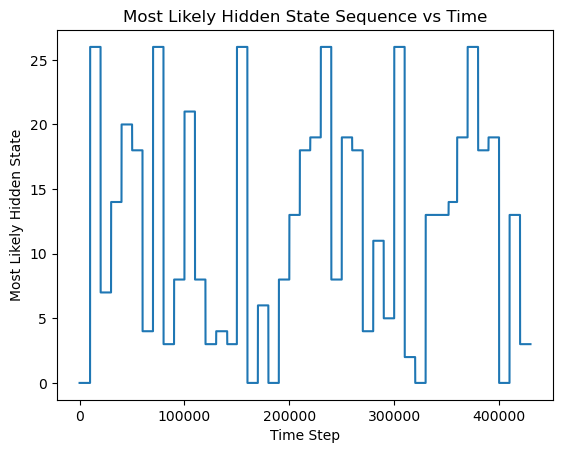

In [19]:
plt.plot(range(T), state_sequence)
plt.xlabel("Time Step")
plt.ylabel("Most Likely Hidden State")
plt.title("Most Likely Hidden State Sequence vs Time")
plt.show()